# Exercício

In [1]:
# Importando as bibliotecas
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
# Carregando o dataset
dataset = r'datasets/AdventureWorks.xlsx'
df = pd.read_excel(dataset)

In [7]:
df.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


## 1. Qual a receita total?

In [8]:
df['Valor Venda'].sum()

5984606.1426

## 2. Qual o custo total?

In [12]:
df['Custo'] = df['Custo Unitário'].mul(df['Quantidade'])
df['Custo'].sum()

2486783.05

## 3. Qual o lucro total?

In [15]:
df['Lucro'] = df['Valor Venda'] - df['Custo']
df['Lucro'].sum()

3497823.0926

## 4. Qual o tempo de envio - em dias - para um produto ser enviado?

In [17]:
df['Tempo_Envio'] = df['Data Envio'] - df['Data Venda']

## 5. Qual a média de tempo de envio para cada marca?

In [22]:
df['Tempo_Envio'] = df['Tempo_Envio'].dt.days
df.groupby('Marca')['Tempo_Envio'].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_Envio, dtype: float64

## 6. Verifique se há valores nulos

In [23]:
df.isna().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo_Envio       0
dtype: int64

## 7. Qual foi o lucro por ano e por marca

In [26]:
pd.options.display.float_format = '{:20,.2f}'.format

In [27]:
df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

## 8. Qual o total de produtos vendidos?

In [29]:
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

## 9. Gráfico do total de produtos vendidos (Barras horizontais)

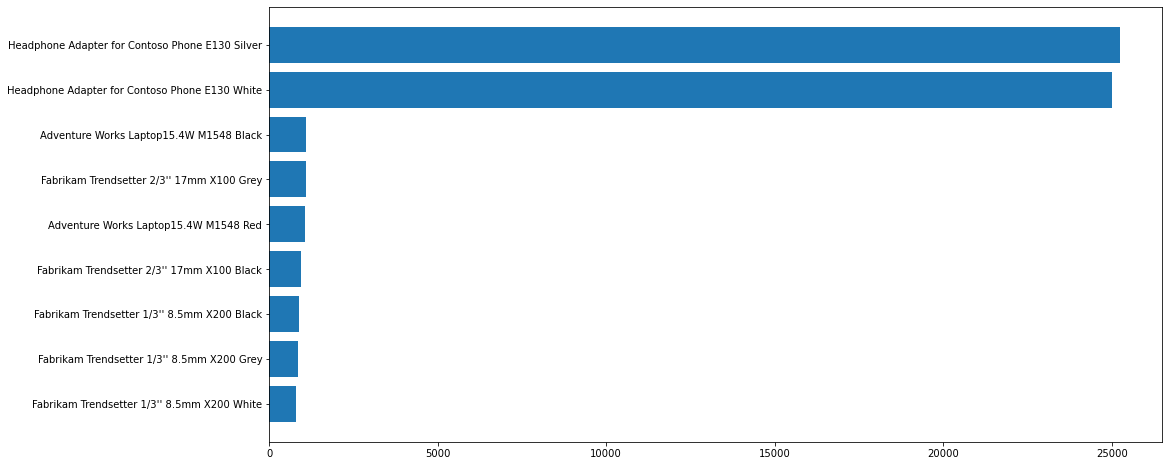

In [32]:
tprd = df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(16,8))

ax.barh(tprd.index, tprd.values)
ax.invert_yaxis()

plt.show()

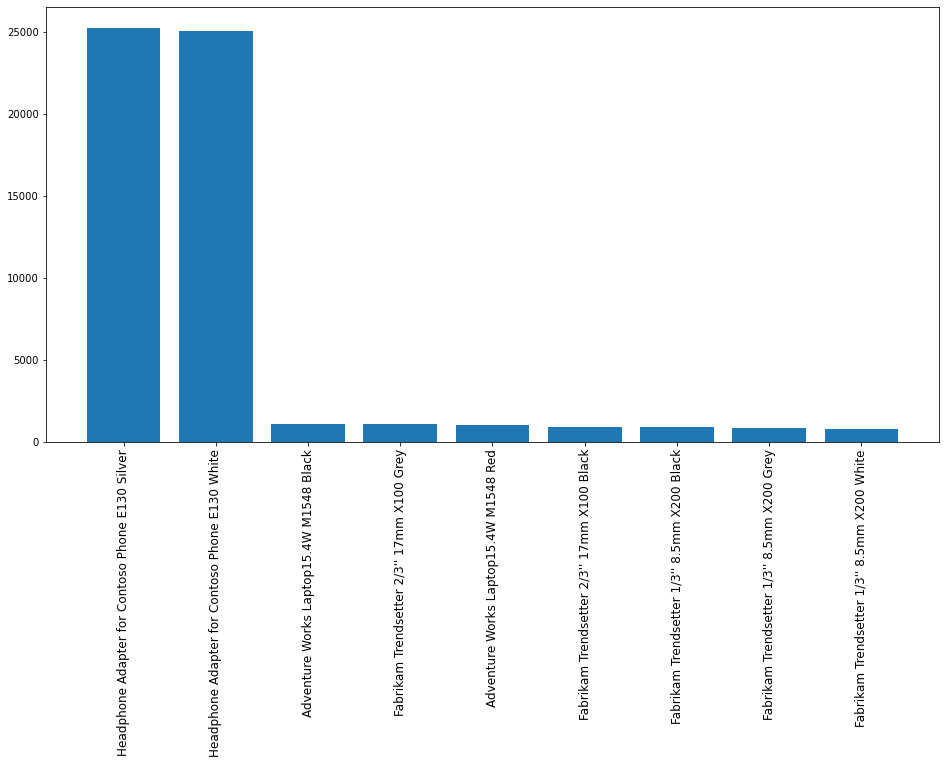

In [52]:
tprd = df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(16,8))

ax.bar(tprd.index, tprd.values)
ax.set_xticks(tprd.index)
ax.set_xticklabels(labels=tprd.index, fontsize=12, rotation=90)

plt.show()

## 10. Qual o total de lucro por ano?

In [39]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

## 11. Gráfico Lucro x Ano

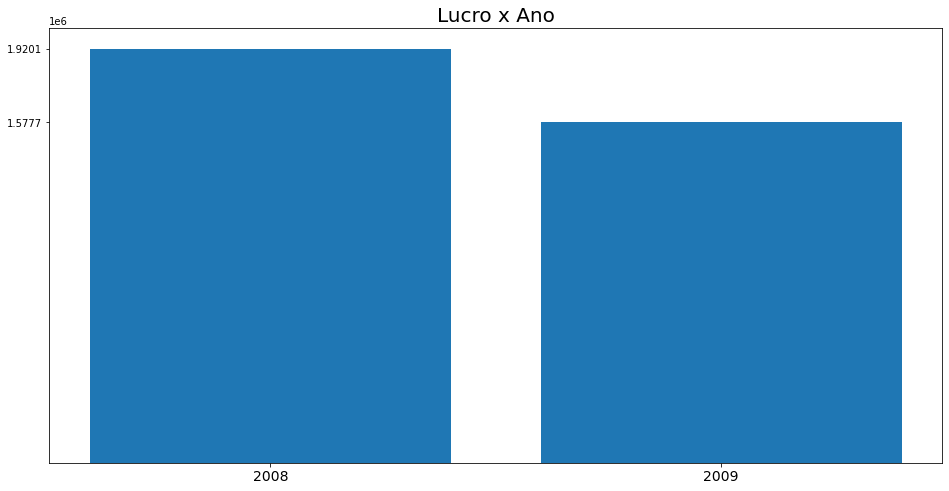

In [50]:
lucro_ano = df.groupby(df['Data Venda'].dt.year)['Lucro'].sum()

fig, ax = plt.subplots(figsize=(16,8))

ax.bar(lucro_ano.index, lucro_ano.values)
ax.set_xticks(lucro_ano.index)
ax.set_xticklabels(labels=lucro_ano.index, fontsize=14)
ax.set_yticks(lucro_ano.values)
ax.set_title('Lucro x Ano', fontsize=20)
plt.show()

## 12. Selecionar somente 2009

In [55]:
df_2009 = df[df['Data Venda'].dt.year == 2009]
df_2009.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11


## 13. Gráfico de linhas lucro x mês com rótulos

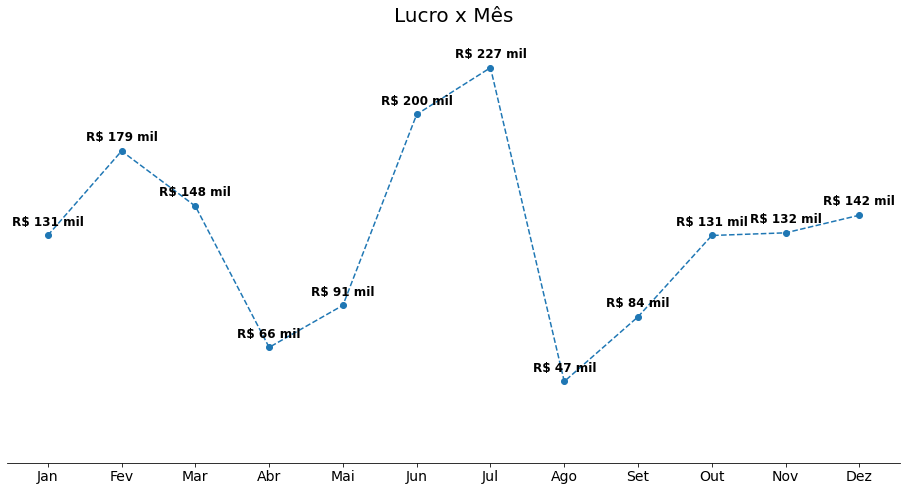

In [78]:
lucro_mes_09 = df_2009.groupby(df_2009['Data Venda'].dt.month)['Lucro'].sum()

fig, ax = plt.subplots(figsize=(16,8))

ax.plot(lucro_mes_09.index, lucro_mes_09.values, marker='o', linestyle='dashed')
ax.set_title('Lucro x Mês', fontsize=20)
ax.set_xticks(lucro_mes_09.index)
ax.set_xticklabels(
    labels=lucro_mes_09.index.map(
        {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 5: 'Mai', 6: 'Jun',
         7: 'Jul', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'}
    ),
    fontsize=14
)

ax.set_yticks([])
ax.set_ylim([0, 250000])
ax.spines[['top', 'right', 'left']].set_visible(False)

for i in range(12):
    ax.annotate(
        f'R$ {lucro_mes_09.values[i] / 1000:,.0f} mil',
        (lucro_mes_09.index[i], lucro_mes_09.values[i]),
        ha='center',
        xytext=(0, 10),
        textcoords='offset points',
        fontweight='bold',
        fontsize=12
    )

plt.show()

## 14. Gráfico de barras  Lucro x Marca

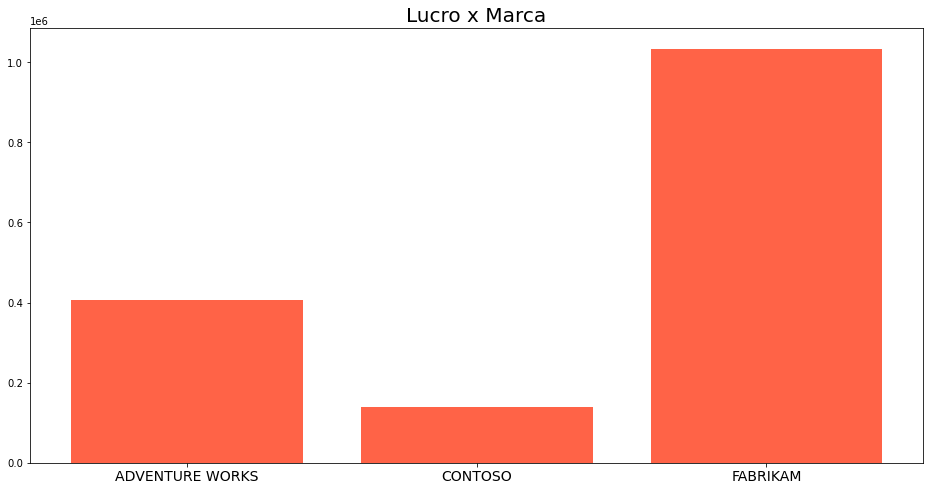

In [83]:
lucro_marca = df_2009.groupby('Marca')['Lucro'].sum()

fig, ax = plt.subplots(figsize=(16,8))

ax.bar(lucro_marca.index, lucro_marca.values, color='tomato')
ax.set_title('Lucro x Marca', fontsize=20)
ax.set_xticks(lucro_marca.index)
ax.set_xticklabels(labels=lucro_marca.index.str.upper(), fontsize=14)

plt.show()

## 15. Gráfico de barras Lucro x Classe

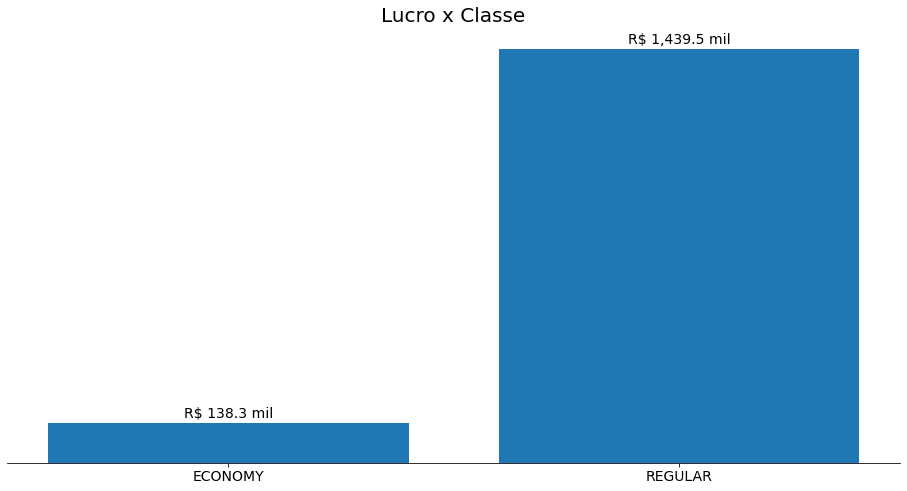

In [114]:
lucro_classe = df_2009.groupby('Classe')['Lucro'].sum()

fig, ax = plt.subplots(figsize=(16,8))

ax.bar(lucro_classe.index, lucro_classe.values)
ax.set_title('Lucro x Classe', fontsize=20)
ax.set_xticks(lucro_classe.index)
ax.set_xticklabels(labels=lucro_classe.index.str.upper(), fontsize=14)

ax.set_yticks([])
ax.spines[['top', 'right', 'left']].set_visible(False)

for i in range(2):
    ax.annotate(
        f'R$ {lucro_classe.values[i] / 1000:,.1f} mil',
        (i, lucro_classe.values[i]),
        ha='center',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=14
    )

plt.show()

## 16. Análise estatística de Tempo_envio do dataset inteiro

### Describe( )

In [116]:
df['Tempo_Envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_Envio, dtype: float64

### Gráfico Boxplot

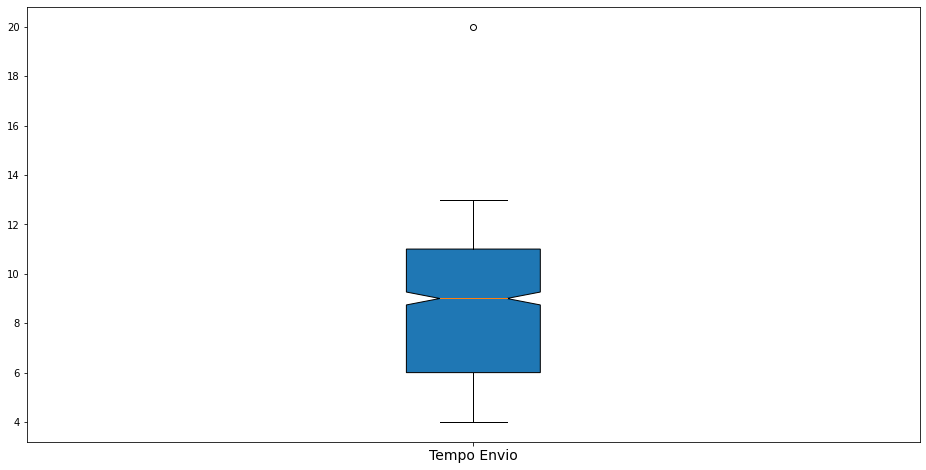

In [124]:
fig, ax = plt.subplots(figsize=(16,8))

ax.boxplot(df['Tempo_Envio'], notch=True, patch_artist=True)

plt.xticks([1], ['Tempo Envio'], fontsize=14)
plt.show()

### Histograma (Definir tipo de gráfico histograma)

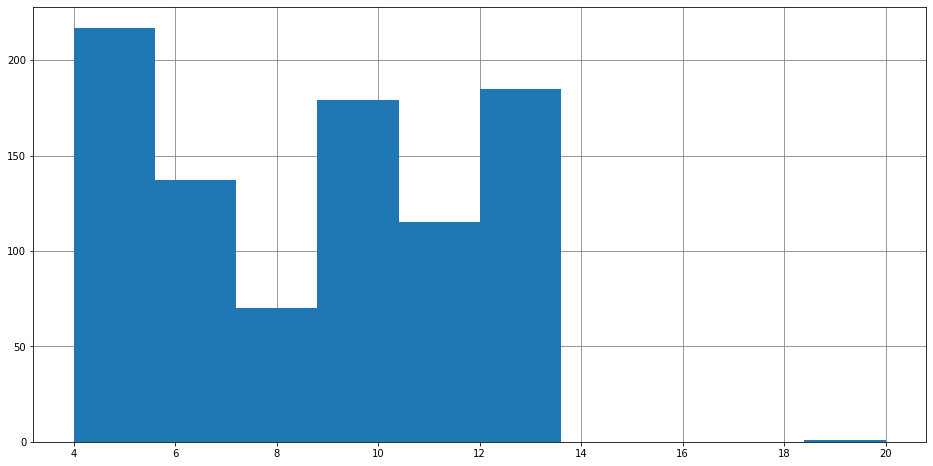

In [131]:
fig, ax = plt.subplots(figsize=(16,8))

ax.hist(df['Tempo_Envio'])
ax.grid(visible=True, axis='both', color='grey')
ax.set_axisbelow(True)

plt.show()

### Tempo mínimo de envio

In [132]:
df['Tempo_Envio'].min()

4

### Tempo máximo de envio

In [133]:
df['Tempo_Envio'].max()

20

## 17. Identificando o Outlier (Qual é este produto?)

In [134]:
df.loc[df['Tempo_Envio'] == df['Tempo_Envio'].max(), :]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [135]:
df[df['Tempo_Envio'] == df['Tempo_Envio'].max()]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20
